<a href="https://colab.research.google.com/github/Ludvins/PAC_Bayes_Chernoff_MLL/blob/main/DIY-LinearRegressionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


# **Can simple linear regression be considered a ML method?**

Before we can 'learn' to fit a model, we need data.
Here we generate (*x*,*y*) pairs from a linear model. We sample 1000 *x*-values uniformly from the interval [-3,3] and compute corresponding *y*-values.
To make the learning problem less trivial we add some noise to the *y*-values, randomly generated from a normal distrution with *mean* 0 and *standard deviation* 2.
The resulting data points, as well as the 'true model' are plotted.
The true model is *y* = 2 * *x* + 3; you can change the values of intercept *a* and slope *b* to define your own model.

In [2]:
# Parameters of the data generating 'true' linear model y=b*x+a (change if you like)
a_t = 3  # intercept
b_t = 2  # slope

In [3]:
# Generate (noisy) data from the model; 1000 samples are generated
# (run this any time you want to generate new data)
x = np.random.uniform(-3,3,1000)
y = b_t*x + a_t + np.random.normal(0,2, 1000)

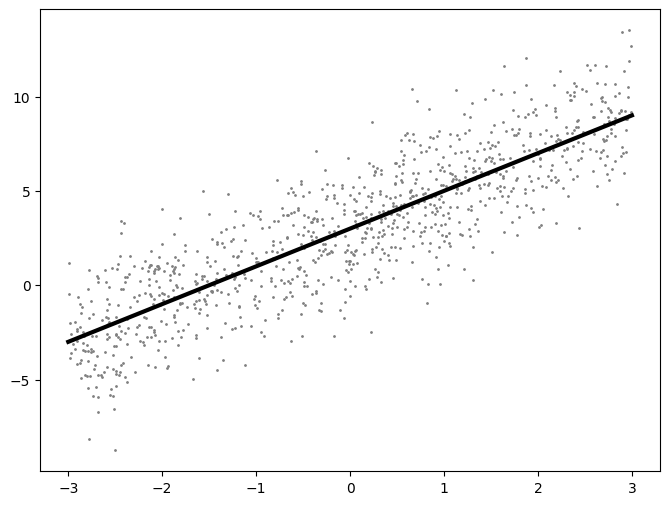

In [4]:
#Show the data points and the true model  (just run; don't edit)
plt.figure(figsize=(8,6))
plt.scatter(x,y, s=1, color="grey")
f_t = lambda xi : a_t + b_t*xi
plt.plot([-3,3],[f_t(-3), f_t(3)], "black",linewidth=3)

plt.show()

If we have a function that defines *Y* in terms of *X*, then we can predict *Y* from *X* (our Task). We first make assumptions about the type of model to fit (learn). Let's assume we want to fit a *linear regression model*. In essence this is a straight line and can thus be defined using two datapoints only.

Let's see what happens if we use just two datapoints (just run, don't edit):

Selected x-values: [[-0.39042355 -0.73532671]] and corresponding y-values: [[2.82297206 0.25394603]]
RMSE: 9.643260485841372


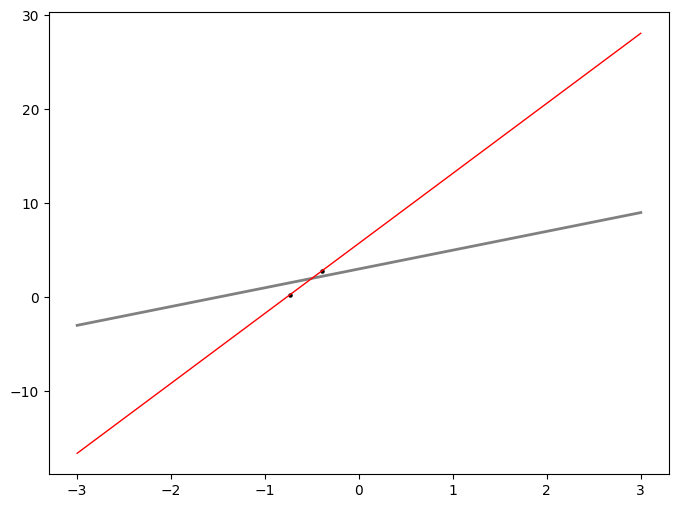

In [5]:
# Take the first two x and y values from our generated data sample
t = [2]
x_partial, y_partial = x[:t[0]].reshape(1, -1) ,y[:t[0]].reshape(1, -1)
print('Selected x-values:', x_partial, 'and corresponding y-values:', y_partial)

# Fit a regression model
m = LinearRegression().fit(x_partial.T, y_partial.T)

b = m.coef_[0][0]
a = m.intercept_[0]

# Compute rmse (best value is 0)
y_estimate = a + b * x
rmse = math.sqrt(np.mean((y - y_estimate)**2))
print('RMSE:', rmse)

# Plot fitted function, including true model
plt.figure(figsize=(8,6))
plt.scatter(x_partial,y_partial, s=5, color="black")
plt.plot([-3,3],[f_t(-3), f_t(3)], "grey",linewidth=2)  #true model
f = lambda xi : a + b*xi
plt.plot([-3,3],[f(-3), f(3)], "red",linewidth=1)        #fitted model
plt.show()

**Question:** Regenerate data and again fit a model on two of its datapoints. Can you explain what happens?

Now let's repeat the above by fitting on larger subsets of the sampled data. The code below iterates over 7 data set sizes, fitting models to each and plotting them in one figure. Feel free to change the numbers in array *t* and see what happens (note: the largest possible subset is 1000 (= all generated data); if you want to use _more_ than 7 subsets, you should also add some colors to array *co*).

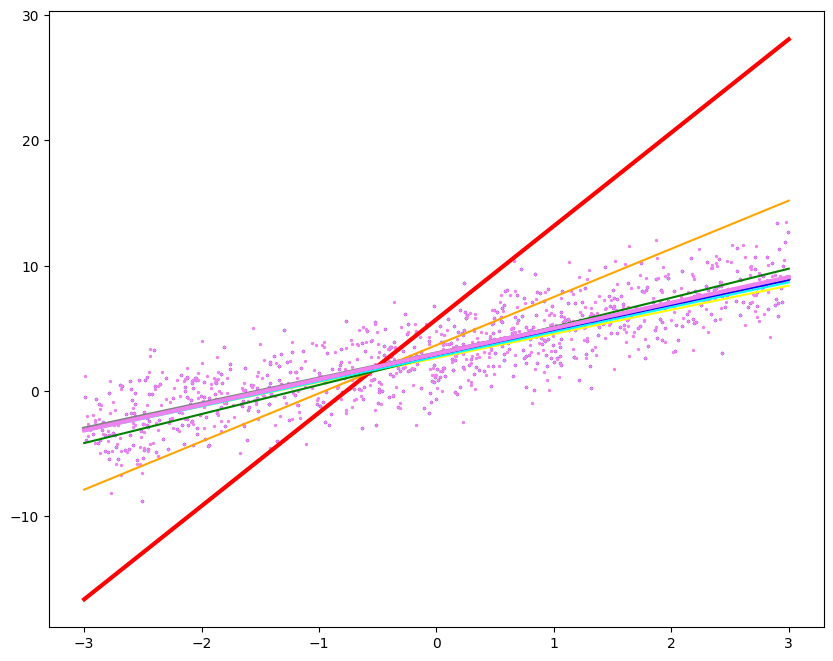

In [6]:
# Take increasingly larger subsets of data  (change numbers if you like)
t = [2,4,6,10,100,500,1000]


# Define a separate color to be used for the associated plots
co = ["red","orange","yellow","green","cyan","blue","violet"]


# Initialize array for rmse and score values
rmse = [0]*len(t)
rsq = [0]*len(t)

# Plot true model for comparison
plt.figure(figsize=(10,8))
plt.plot([-3,3],[f_t(-3), f_t(3)], "grey",linewidth=3)


# Iterate over all data sets
for i in range(0, len(t)):

  x_partial, y_partial = x[:t[i]].reshape(1, -1) ,y[:t[i]].reshape(1, -1)
  plt.scatter(x_partial,y_partial, s=2, color= co[i])

  m = LinearRegression().fit(x_partial.T, y_partial.T)

  b = m.coef_[0][0]
  a = m.intercept_[0]

  rsq[i] = m.score(x_partial.T, y_partial.T)

  y_estimate = a + b * x
  rmse[i] = math.sqrt(np.mean((y - y_estimate)**2))

  f = lambda xi : a + b*xi
  if ((i==0) or (i==(len(t)-1))):
    plt.plot([-3,3],[f(-3), f(3)], c = co[i],linewidth=3) #worst and best?
  else:
    plt.plot([-3,3],[f(-3), f(3)], c = co[i])

plt.show()

**Question:** Looking at the plots of the fitted models: is this machine learning? That is, does the model performance, measured in RMSE, improve with more data?  

Let's look at the RMSE of the models:


RMSE: [9.643260485841372, 3.699260494768601, 2.067915551192013, 2.093768589356195, 2.0480722453314275, 2.0352973849687057, 2.0319298682000024]


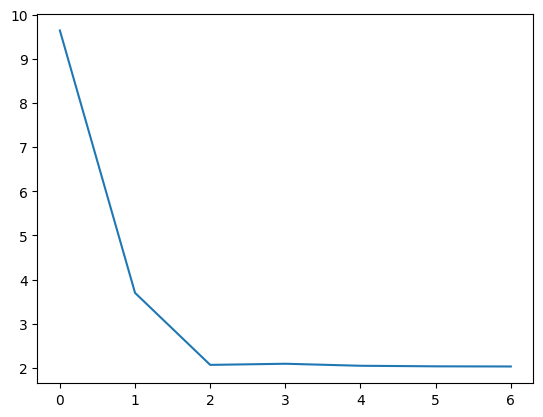

In [7]:
print('RMSE:',rmse)
i=range(0,len(t))
plt.plot(i,rmse)
plt.show()

Actually, scikit's LinearRegression does not use RMSE, but R^2: the so-called "coefficient of determination".
Both measures result in the same choice of model;
the following plot shows both of them (RMSE in blue, R^2 in orange):  


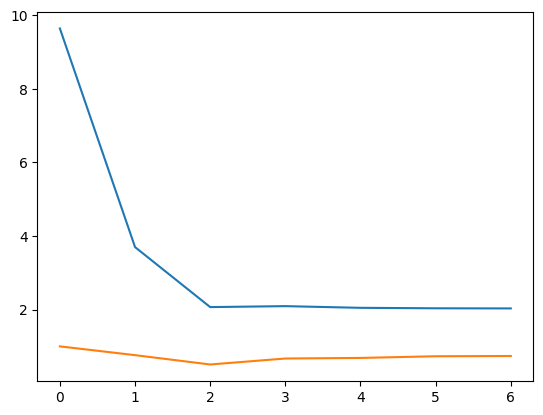

In [8]:
i=range(0,len(t))
plt.plot(i,rmse)
plt.plot(i,rsq)
plt.show()